#### Summary
> - Most of the cases has more information loss after using the compact algorithm compared to no compaction at all. In order to avoid this issue, we could do:
>   - Remove the minimum compact length, so that we won't compact the list. We can set the minimum length equals to the max length of list.
>   - There are some variable values shouldn't considered as information loss when they are missing, we should flag these variableIds and exclude them when comparing.
> - Added sampling variables seems make little difference to the compact storage as well as the information loss.

> - CSV Data query SQL
```
    select
      conf_name,
      (1 - compacted_size / compacted_count) as compact_storage_saving,
      compacted_info_loss_percent as compacted_info_loss,
      total_info_loss_percent as total_info_loss,
      no_compact_loss_percent as no_compact_loss
    from
      default.compact_efficiency
    where
      raw_useful_count > conf_compact_min_len
```

In [129]:
import pandas as pd
import os

def load_data(filename):
    csv_path = os.path.join('datasets', filename)
    return pd.read_csv(csv_path)

compacted = load_data('compacted_raw.csv')
# conf_name_list = compacted['conf_name'].unique()

conf_name_list = ["DEFAULT_CONF", "MIN100_MAX400_SEC5", "MIN100_MAX400_SEC5_SMP29A1", 
                  "MIN100_MAX400_SEC10", "MIN100_MAX400_SEC10_SMP29A1", "MIN100_MAX800_SEC1",
                 "MIN50_MAX400_SEC1", "MIN50_MAX400_SEC5"]

compacted['info_save'] = compacted['no_compact_loss'] - compacted['total_info_loss']
compacted.head()

,conf_name,compact_storage_saving,compacted_info_loss,total_info_loss,no_compact_loss,info_save
0,MIN50_MAX400_SEC1,0.013158,0.006579,0.006579,0.0,-0.006579
1,MIN50_MAX400_SEC1,0.014706,0.000000,0.000000,0.0,0.000000
2,MIN50_MAX400_SEC1,0.025478,0.003185,0.003185,0.0,-0.003185
3,MIN50_MAX400_SEC1,0.208955,0.208955,0.208955,0.0,-0.208955
4,MIN50_MAX400_SEC1,0.000000,0.000000,0.000000,0.0,0.000000


In [146]:
for conf_name in conf_name_list:
    filterd = compacted.loc[compacted['conf_name'] == conf_name]
    
    print(conf_name + " | info loss worse than no compact percent: " + 
          str(filterd.loc[compacted['info_save'] < 0].shape[0] / filterd.shape[0]))
    print(filterd[["compact_storage_saving", "compacted_info_loss", "info_save"]].describe())
    

DEFAULT_CONF | info loss worse than no compact percent: 0.3764853033145716
       compact_storage_saving  compacted_info_loss    info_save
count             1599.000000          1599.000000  1599.000000
mean                 0.067108             0.036915     0.004705
std                  0.168701             0.106075     0.173118
min                  0.000000             0.000000    -0.947059
25%                  0.000000             0.000000    -0.013029
50%                  0.007353             0.000000     0.000000
75%                  0.033333             0.017938     0.000000
max                  0.970880             0.970880     0.973782
MIN100_MAX400_SEC5 | info loss worse than no compact percent: 0.6779237023139462
       compact_storage_saving  compacted_info_loss    info_save
count             1599.000000          1599.000000  1599.000000
mean                 0.125278             0.080950    -0.037469
std                  0.207219             0.143430     0.195023
min         

DEFAULT_CONF


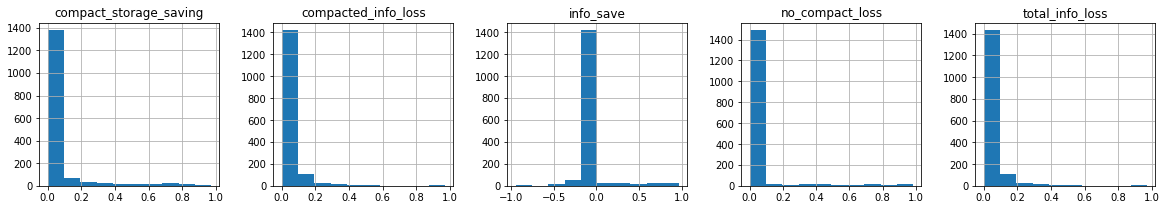

MIN100_MAX400_SEC5


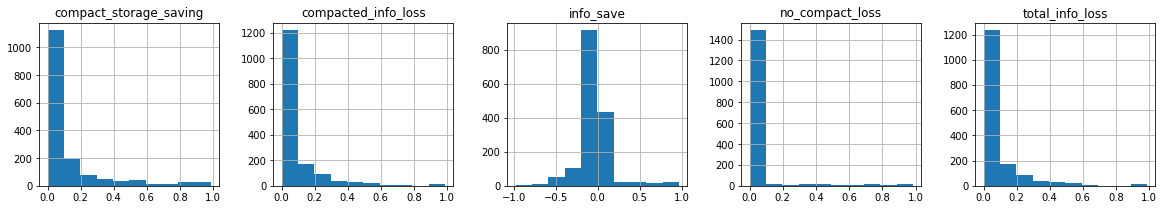

MIN100_MAX400_SEC5_SMP29A1


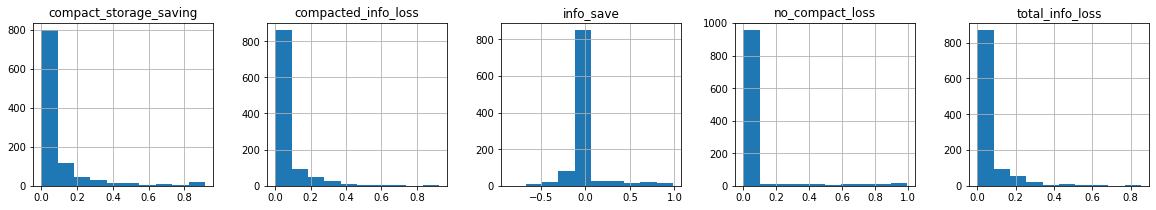

MIN100_MAX400_SEC10


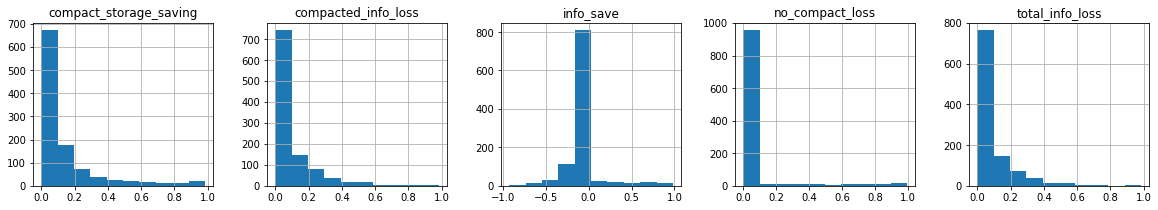

MIN100_MAX400_SEC10_SMP29A1


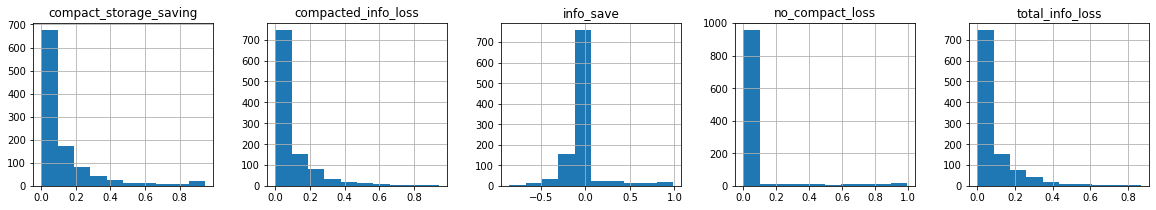

MIN100_MAX800_SEC1


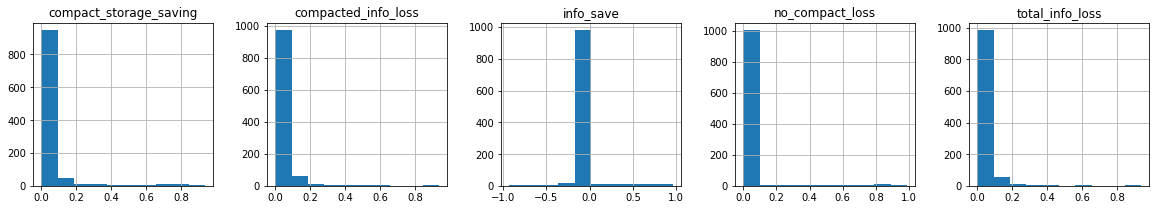

MIN50_MAX400_SEC1


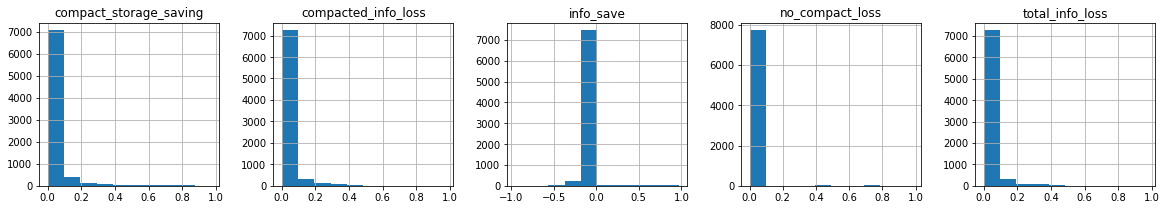

MIN50_MAX400_SEC5


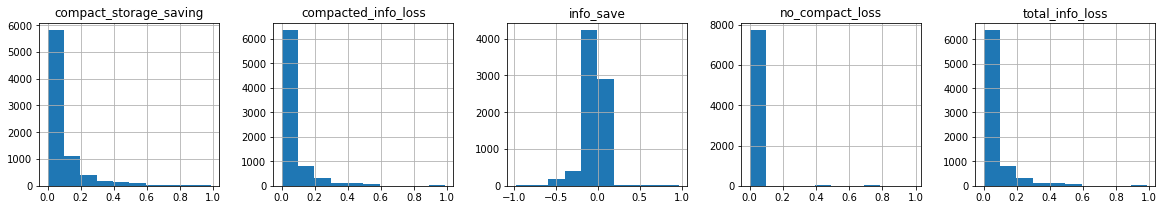

In [144]:
for conf_name in conf_name_list:
    filterd = compacted.loc[compacted['conf_name'] == conf_name]
    print(conf_name)
    filterd.hist(figsize=(20, 3), layout=(1, 5))
    
    plt.show()


DEFAULT_CONF


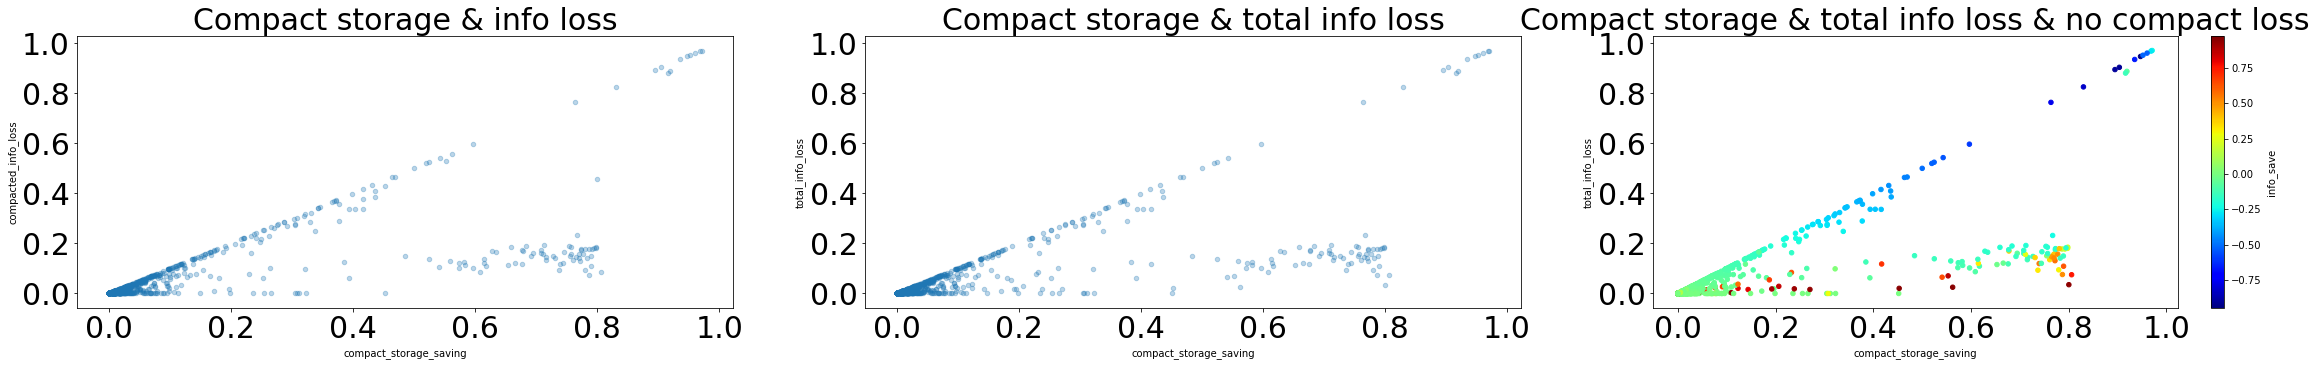

MIN100_MAX400_SEC5


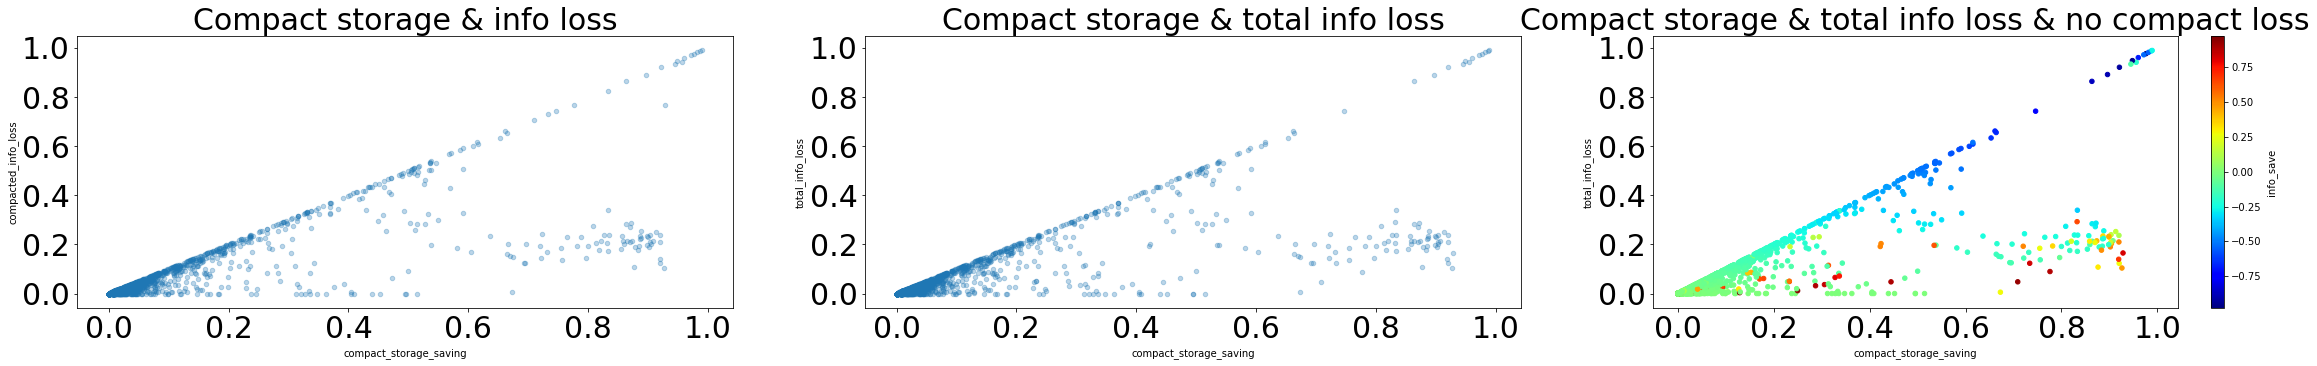

MIN100_MAX400_SEC5_SMP29A1


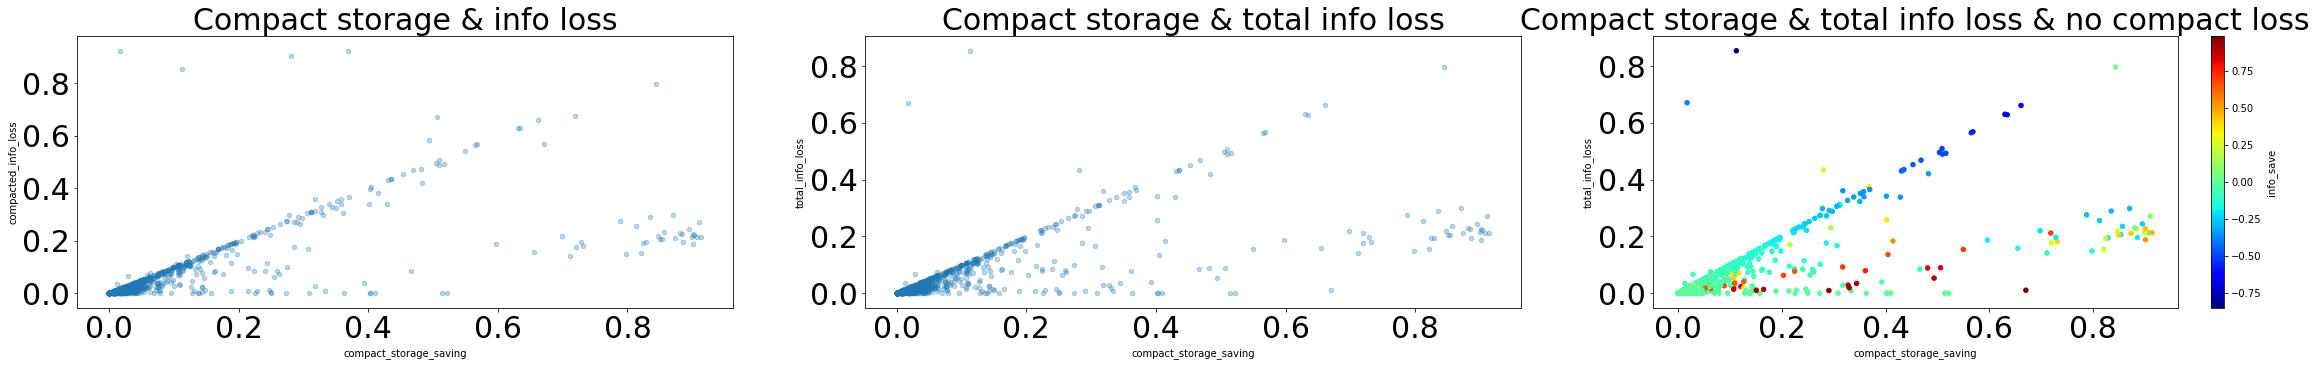

MIN100_MAX400_SEC10


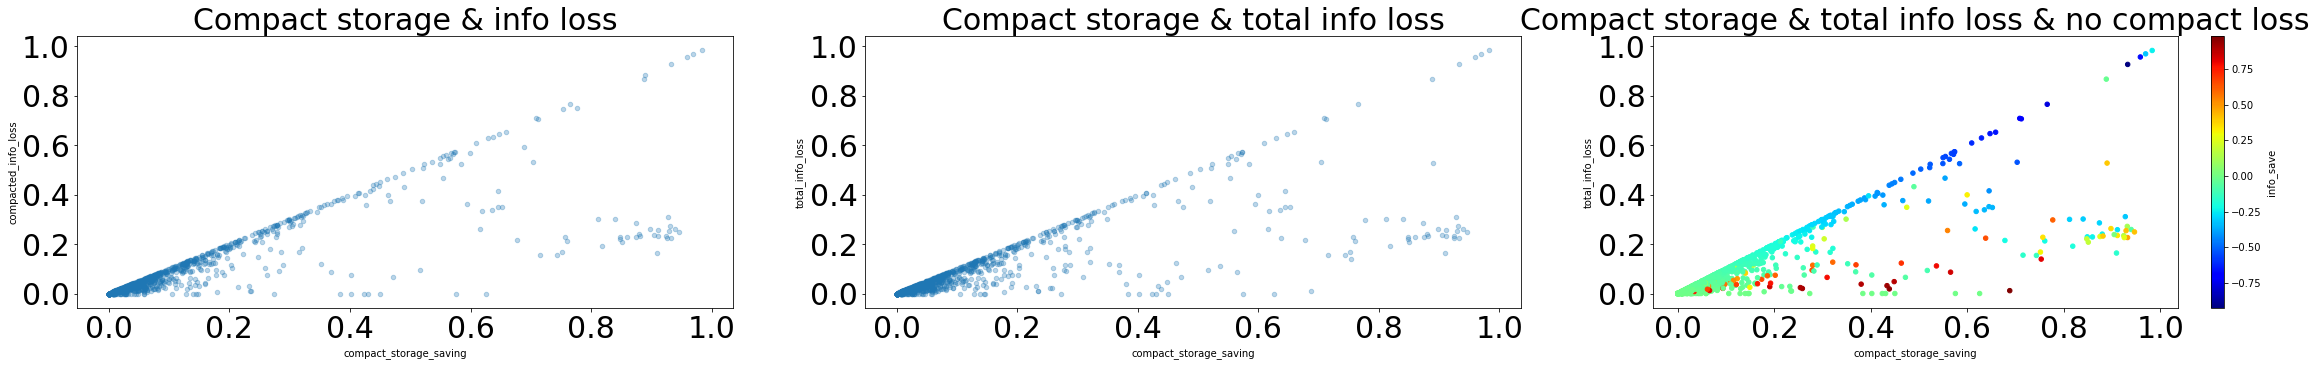

MIN100_MAX400_SEC10_SMP29A1


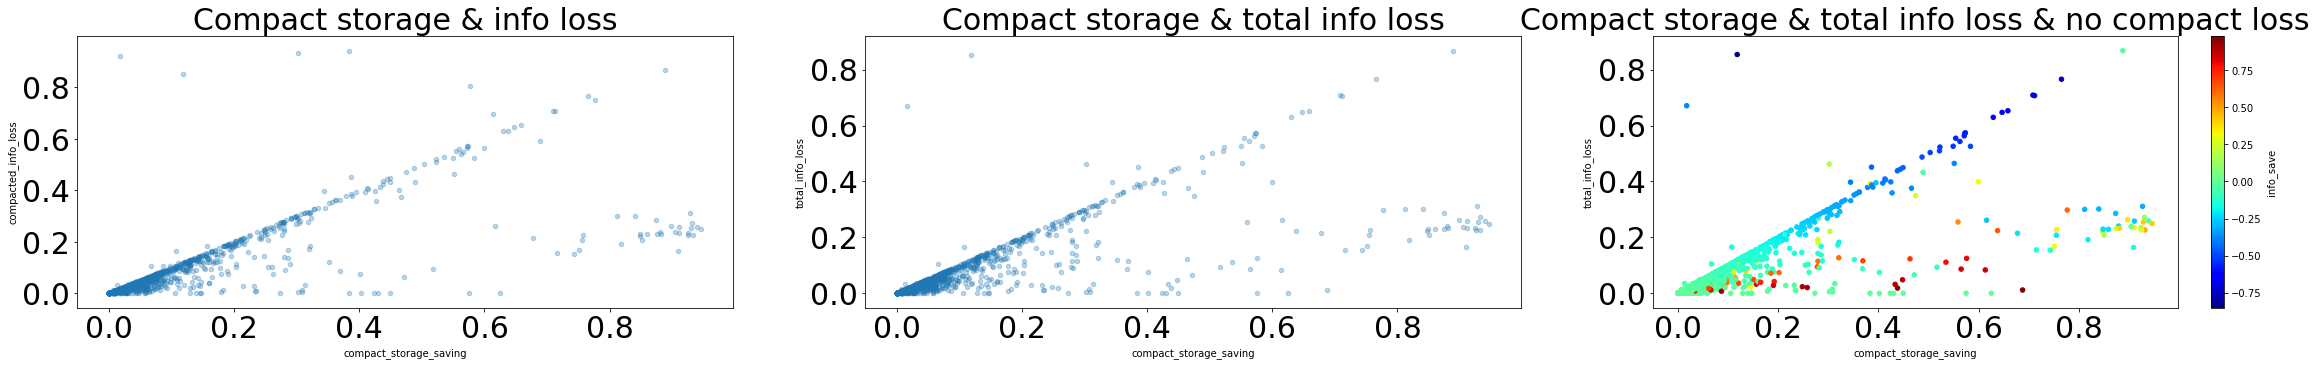

MIN100_MAX800_SEC1


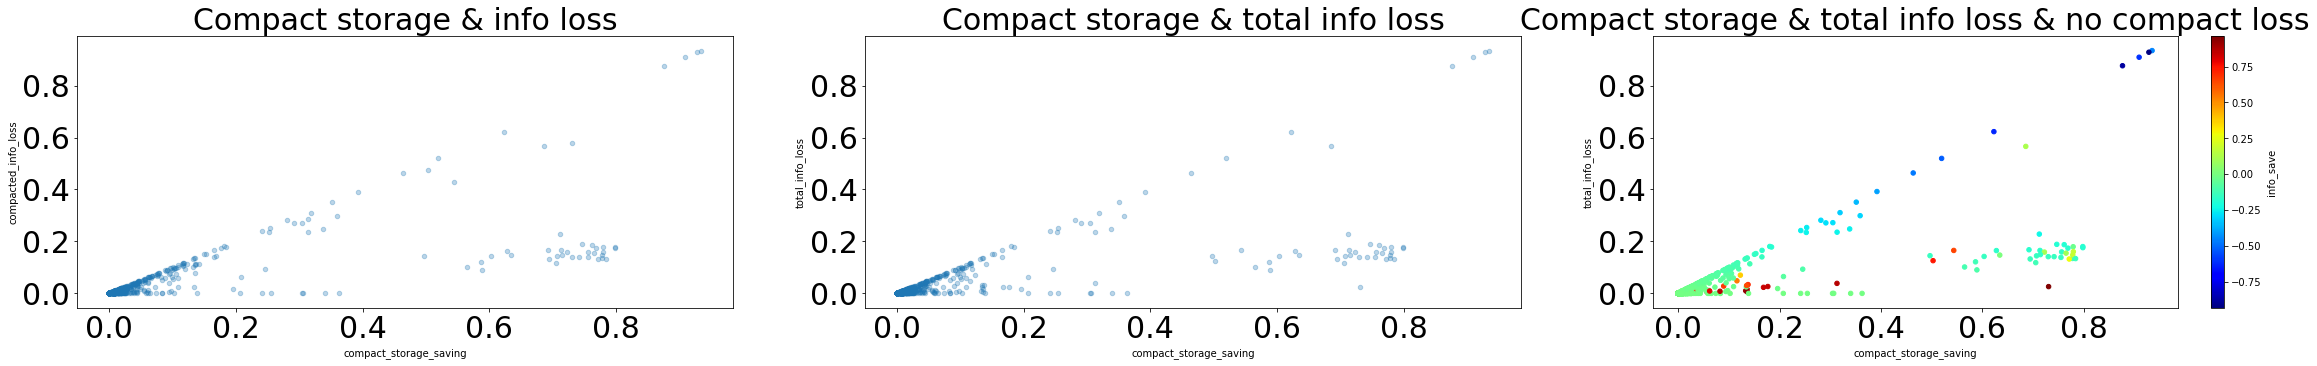

MIN50_MAX400_SEC1


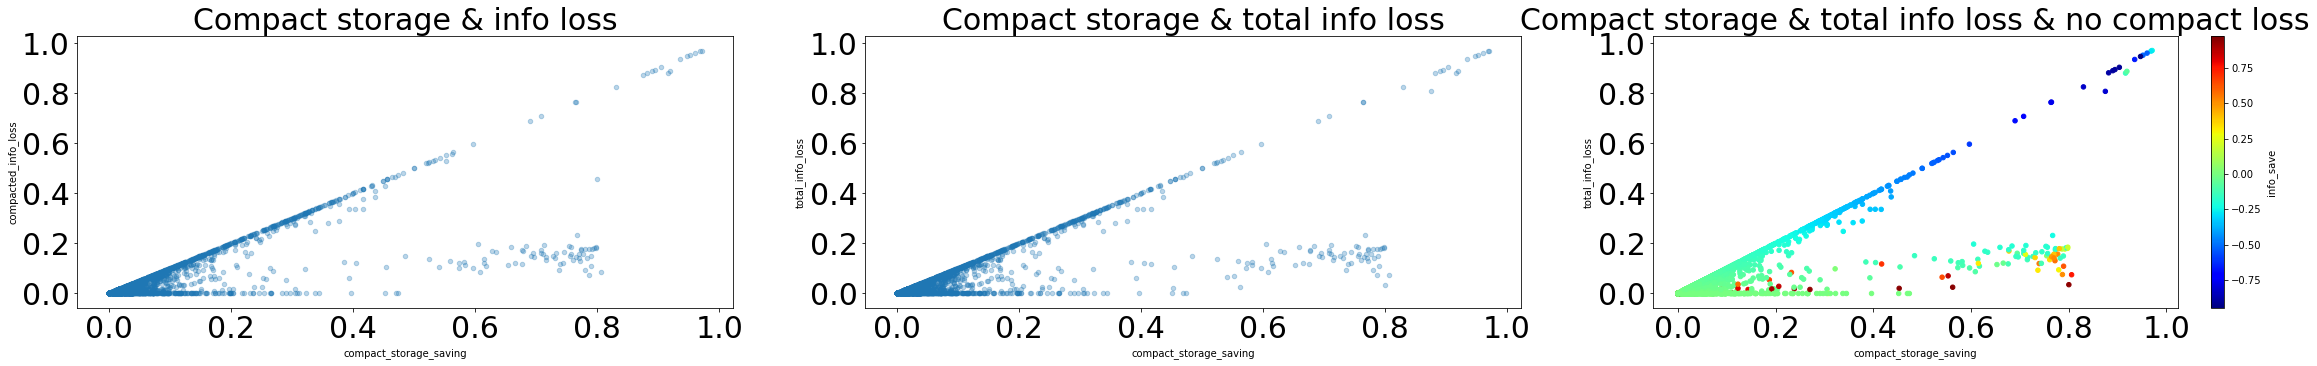

MIN50_MAX400_SEC5


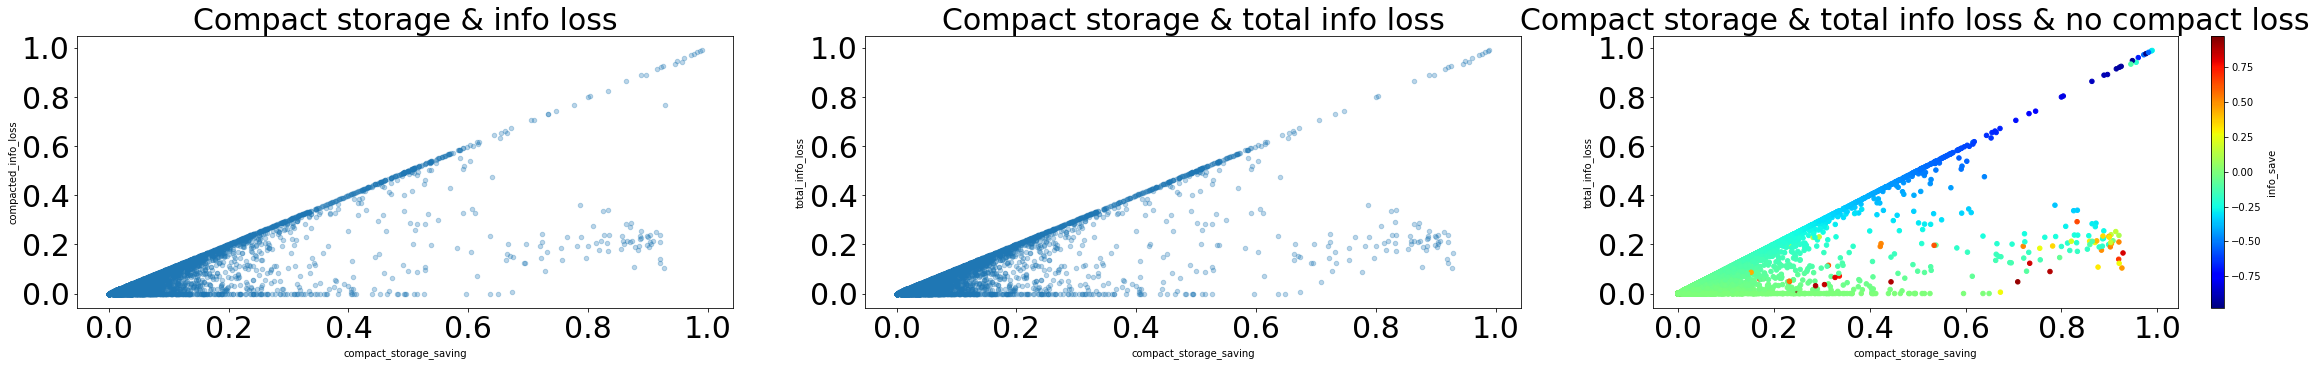

In [145]:

for conf_name in conf_name_list:
    filterd = compacted.loc[compacted['conf_name'] == conf_name]
    print(conf_name)
    
    fig, axes = plt.subplots(1, 3, figsize=(40, 5))
    filterd.plot(kind='scatter', x='compact_storage_saving', y='compacted_info_loss', alpha=0.3, ax=axes[0], fontsize=30)
    axes[0].set_title('Compact storage & info loss', fontsize=30)

    filterd.plot(kind='scatter', x='compact_storage_saving', y='total_info_loss', alpha=0.3, ax=axes[1], fontsize=30)
    axes[1].set_title('Compact storage & total info loss', fontsize=30)
        
    filterd.plot(kind='scatter', x='compact_storage_saving', y='total_info_loss', 
#                  s=filterd['no_compact_loss'], label='NoCompactLoss', 
                 c="info_save", cmap=plt.get_cmap("jet"), colorbar=True,
                 ax=axes[2], fontsize=30)
    axes[2].set_title('Compact storage & total info loss & no compact loss', fontsize=30)
    plt.show()